<a href="https://colab.research.google.com/github/PawarTEJA/Prediction-of-Bank-Note-original-Fake-/blob/main/projectcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Decisiontree/BankNote_Authentication.csv')

In [5]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
x = df.drop('class', axis = 1)
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [7]:
y = df['class']

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =0)

In [11]:
len(x_train)

1029

In [12]:
len(x_test)

343

In [13]:
from collections import Counter

In [15]:
Counter(y)

Counter({0: 762, 1: 610})

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state= 0)

In [18]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [19]:
y_pred = clf.predict(x_test)

In [21]:
result= pd.DataFrame({'Actual': y_test,  'Predicted': y_pred})

In [22]:
result

,Actual,Predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
866,1,1
361,0,0
703,0,0
328,0,0


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
confusion_matrix(y_test, y_pred)

array([[190,   5],
       [  2, 146]])

In [26]:
Counter(y_test)

Counter({1: 148, 0: 195})

In [27]:
new = [[-4.1261, -13.7889, 16.3087, -3.2194]]

In [29]:
clf.predict(new)[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [30]:
new1 = [[0.51947, -3.2633, 3.0895, -0.98492]]

In [31]:
clf.predict(new1)[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [32]:
clf.feature_importances_

array([0.59654175, 0.24104969, 0.13641695, 0.02599161])

In [33]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

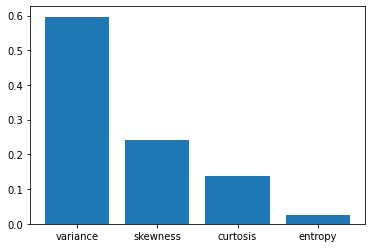

In [34]:
plt.bar(x.columns, clf.feature_importances_)

Decision Tree

In [35]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [36]:
dot_data = StringIO()

In [37]:
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, feature_names = x.columns, special_characters= True)

In [38]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [39]:
graph.write_png('tree.png')

True